## 5. 什么是三因子模型？

## 目录
1. 什么是三因子模型？
2. 如何用优矿获取基本面数据？
3. 如何用三因子模型回归最优股票组合？
3. 如何将三因子模型可视化？

## 什么是三因子模型？

这三个因子一个叫贝塔，一个叫市值，一个叫估值。更简单地说，高贝塔，小盘股和低市净率的价值股会给你带来更好的回报。

### 算法
$R_p - R_r = \beta  (R_M - R_r) + \beta_1  HML + \beta_2 * SMB + \alpha + \epsilon$

HML 对应PB，将PB分成三档。最高的为成长性（H），最低的为价值型（L），高组收益率平均减去低组收益率平均；

SMB 对应LCAP，将LCAP分成三档。最小的为小公司（S），最大的为大公司（B），小公司收益率平均减去大公司收益率平均。

其中，收益率为月度收益。 Rp 是单只股票的月度收益率. RM是沪深300的月度收益率.

## 如何用优矿获取基本面数据？
在优矿获取数据，并且保存为csv。

具体可以参考： https://uqer.io/community/share/591a6b87df54d20056791a12

### 主要难点：
- 每个月计算一次SMB前后30%的股票组合的收益差
- 每个月计算一次HML前后30%的股票组合的收益差

In [1]:
# 读取获取后数据
import pandas as pd
import numpy as np

Three_Factors = pd.read_csv('D:\\PycharmProjects\\finance_data\\Three_Factors.csv')
Three_Factors.rename(columns={'Unnamed: 0': 'datetime'}, inplace=True)
Three_Factors.index = Three_Factors.datetime
Three_Factors.pop('datetime')
print Three_Factors.head()

                zglt      zsyh       opt     Index       SMB       HML
datetime                                                              
2015-01-30 -0.089369 -0.138124 -0.125399 -0.010018 -0.490852  0.319662
2015-02-27  0.247500  0.022605  0.081302  0.028630  0.029983  0.046953
2015-03-31 -0.034358  0.056684  0.032922  0.129692  0.056031 -0.022294
2015-04-30  0.737902  0.167699  0.316522  0.182605 -0.087374 -0.092583
2015-05-29 -0.101239 -0.010733 -0.034355  0.035794 -0.029132  0.191970


## 如何用三因子模型回归最优股票组合？

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = Three_Factors.iloc[:, 3:]
Y = Three_Factors.iloc[:, 2]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                    opt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     19.15
Date:                Tue, 16 May 2017   Prob (F-statistic):           4.26e-06
Time:                        11:26:17   Log-Likelihood:                 38.678
No. Observations:                  24   AIC:                            -69.36
Df Residuals:                      20   BIC:                            -64.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.011      1.018      0.3

In [4]:
factors = pd.concat([Three_Factors.Index, Three_Factors.SMB, Three_Factors.HML],axis = 1).dropna()
factors.columns = ['MARKET','SMB','HML']
f_params = np.array(result.params[1:])
print f_params

[ 0.87059051 -0.01723169 -0.40840239]


In [8]:
#因子协方差
cov_factors = np.cov(factors.T)
print cov_factors

## 得出因子方差与剩余风险的方差
print np.dot(np.dot(f_params.T, cov_factors),f_params)

print np.std(result.resid)**2

[[ 0.00800866  0.00012928  0.00080461]
 [ 0.00012928  0.02913037 -0.00546511]
 [ 0.00080461 -0.00546511  0.00938857]]
0.00699161966912
0.00233201035387


## 如何将三因子模型可视化？

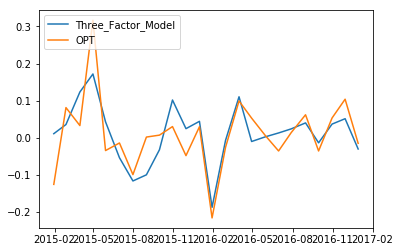

In [27]:
factors_model = result.params[0]+result.params[1]*Three_Factors.Index + result.params[2]*Three_Factors.SMB
+ result.params[3]*Three_Factors.HML

factors_model.index = pd.to_datetime(factors_model.index, format='%Y-%m-%d')
plt.plot(factors_model, label='Three_Factor_Model')
plt.plot(Three_Factors.opt, label='OPT')
plt.legend(loc='upper left')
plt.show()

## 作业
学习如何从优矿获取基本面数据，并保存为csv，作为基本面数据研究。